In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, n_classes=2, random_state=42)



In [8]:

df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y


In [9]:

print(df.head())
print(df.describe())
print(df['target'].value_counts())


   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -4.906442   3.442789   0.558964  -0.976764  -1.568805  -4.271982   
1   2.162610  -5.286651   2.609846  -1.803898  -1.831216   1.450757   
2  -4.784844  -3.744827   4.657592  -1.408806  -5.444758  -2.416013   
3  10.465024   1.070944  -3.562432  -0.849062   2.183860  -0.609893   
4   5.599516  -1.776412  -1.304322  -0.720074   5.859373  -3.292432   

   feature_6  feature_7  feature_8  feature_9  ...  feature_11  feature_12  \
0  -3.727921   0.111868   2.119795  -2.522812  ...   -7.492478    4.264669   
1   2.648709   2.152307   0.524552   0.493548  ...    6.680603   -2.431830   
2   3.556495  -1.572119  -0.730549   3.447661  ...    7.961059   -5.151105   
3   0.946327  -1.046141  -2.057053  -2.056650  ...   -1.449095   -1.217685   
4   3.152205   7.099882  -3.321076   3.245486  ...    6.608729    5.632297   

   feature_13  feature_14  feature_15  feature_16  feature_17  feature_18  \
0    0.304866    0.777693  

In [10]:

X = df.drop('target', axis=1)
y = df['target']


In [11]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [13]:
stump = DecisionTreeClassifier(max_depth=1)



In [20]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME']
}


In [21]:
grid = GridSearchCV(AdaBoostClassifier(estimator=stump, random_state=42),
                    param_grid, cv=5, scoring='accuracy')


grid.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=42),
             param_grid={'algorithm': ['SAMME'],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [22]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)



In [23]:
print("Best Params:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))


Best Params: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 200}
Accuracy: 0.83
Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       106
           1       0.80      0.85      0.82        94

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



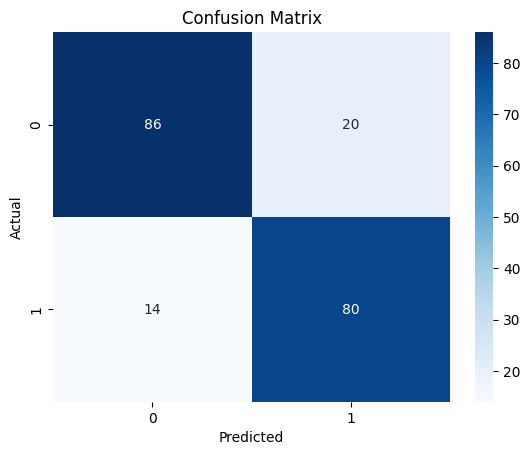

In [24]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [25]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]



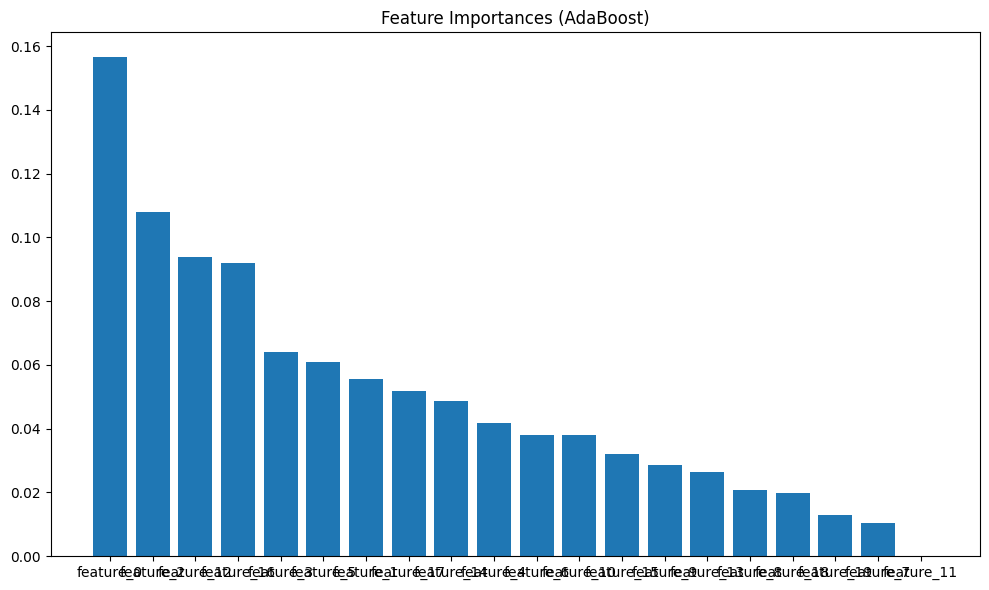

In [26]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (AdaBoost)")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [f'feature_{i}' for i in indices])
plt.tight_layout()
plt.show()